In [2]:
%load_ext autoreload

In [4]:
import os
os.path.abspath(os.curdir)

'/Users/md/Downloads/qa'

In [5]:
%autoreload 2
from src.natural_questions import NaturalQuestions
from src.utils import flatten_list, read_data

In [7]:
import pandas as pd

In [6]:
df_qa=read_data(file_name='data/simplified-nq-train.jsonl', length=10000)

In [24]:
17*1000/55

309.09090909090907

In [44]:
%%time
nq=NaturalQuestions(df_qa)

CPU times: user 9.9 s, sys: 69.8 ms, total: 9.97 s
Wall time: 9.98 s


In [45]:
%%time
nq.get_entities()

CPU times: user 18.3 s, sys: 33.3 ms, total: 18.3 s
Wall time: 18.3 s


In [48]:
nq.summary()

Average number of annotations 1.0
Short answers 4372, 43.72%
Multiple short answers 1175, 12.0%
Long answers 10000, 100.0%
% bool answers 0.0122


In [35]:
is_short_answer=nq.df_qa.ANS_SHORT.apply(lambda x: len(x)>0)
nq.df_qa[is_short_answer].ENTS_SHORT.apply(lambda ents: len(set([e['label'] for e in ents]))).value_counts()

1    2352
0     826
2     294
3      63
4      24
5       4
6       3
Name: ENTS_SHORT, dtype: int64

In [33]:
nq.df_qa[nq.df_qa.ENTS_SHORT.apply(lambda x: len(x)>3)]

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id,first,second,ANS_YES_NO,ANS_SHORT,ANS_LONG,ENTS_SHORT
30,Powerball - wikipedia <H1> Powerball </H1> Jum...,"[{'start_token': 43, 'top_level': True, 'end_t...",when do they pull the powerball numbers 2016,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Po...,4828269869422443677,when,do,NONE,[every Wednesday and Saturday evening at 10 : ...,Drawings for Powerball are held every Wednesda...,"[{'text': 'Wednesday', 'label': 'DATE'}, {'tex..."
45,List of Olympic Games host cities - wikipedia ...,"[{'start_token': 22, 'top_level': True, 'end_t...",where are the upcoming olympics to be held,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Li...,4035615966981436342,where,are,NONE,"[Tokyo for the 2020 Summer Olympics, Beijing f...",This is a list of host cities of the Olympic G...,"[{'text': 'Tokyo', 'label': 'GPE'}, {'text': '..."
194,Bataan Death March - wikipedia <H1> Bataan Dea...,"[{'start_token': 10, 'top_level': True, 'end_t...",where did the bataan death march take place,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Ba...,4007864640422927547,where,did,NONE,"[from Saysain Point , Bagac , Bataan and Mariv...",The Bataan Death March (Filipino: Martsa ng Ka...,"[{'text': 'Saysain Point', 'label': 'ORG'}, {'..."
243,"Fort Myers , Florida - wikipedia <H1> Fort Mye...","[{'start_token': 24, 'top_level': True, 'end_t...",where is fort myers florida located in florida,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Fo...,-5784654886324135475,where,is,NONE,[Coordinates : 26 ° 37 ′ N 81 ° 50 ′ W ﻿ / ﻿ 2...,"<Table> <Tr> <Th_colspan=""2""> Fort Myers, Flor...","[{'text': '26', 'label': 'CARDINAL'}, {'text':..."
246,2018 Winter Olympics opening ceremony - wikipe...,"[{'start_token': 44, 'top_level': True, 'end_t...",who is performing at the 2018 olympics opening...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=20...,-7356892532961931225,who,is,NONE,"[Ha Hyun - woo of the band Guckkasten, Ahn Ji ...","Ha Hyun - woo of the band Guckkasten, Ahn Ji -...","[{'text': 'Ahn Ji - young', 'label': 'PERSON'}..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9642,Volcán de Colima - wikipedia <H1> Volcán de Co...,"[{'start_token': 26, 'top_level': True, 'end_t...",when was the last time volcan de colima erupted,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Vo...,4850204088697908902,when,was,NONE,"[06 : 27 UTC ( 00 : 27 CST ) on January 18 , 2...",Colima volcano experienced another strong expl...,"[{'text': '06', 'label': 'CARDINAL'}, {'text':..."
9688,I Want You Back - wikipedia <H1> I Want You Ba...,"[{'start_token': 40, 'top_level': True, 'end_t...",who wrote i want you back by the jackson 5,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=I_...,4910332202241394042,who,wrote,NONE,"[Berry Gordy, Freddie Perren, Alphonso Mizell,...","<Table> <Tr> <Th_colspan=""2""> ``I Want You Bac...","[{'text': 'Berry Gordy', 'label': 'ORG'}, {'te..."
9698,Lagos State ministry of Education - Wikipedia ...,"[{'start_token': 20, 'top_level': True, 'end_t...",where is lagos state ministry of education loc...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=La...,-6929896579581382366,where,is,NONE,"[State Government Secretariat , Alausa , Lagos...",<Table> Lagos State Ministry of Education <Tr>...,"[{'text': 'State Government Secretariat', 'lab..."
9714,2018 FIFA World Cup knockout stage - wikipedia...,"[{'start_token': 18, 'top_level': True, 'end_t...",dates of world cup quarter and semi finals,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=20...,-731

In [29]:
srs=pd.Series(flatten_list(
    nq.df_qa.ENTS_SHORT.apply(lambda ents: 
                              list(set([e['label'] for e in ents]))))).value_counts()

<AxesSubplot:ylabel='None'>

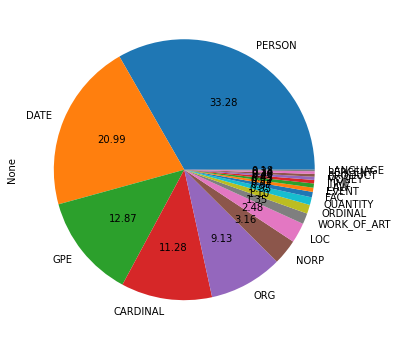

In [30]:
srs.plot.pie(figsize=(6, 6),autopct='%.2f',)

<AxesSubplot:ylabel='ANS_SHORT'>

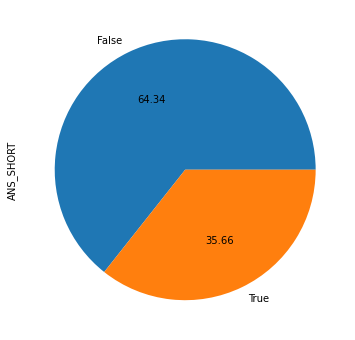

In [22]:
nq.df_qa.ANS_SHORT.apply(lambda x: len(x)>0).value_counts().plot.pie(figsize=(6, 6),autopct='%.2f',)

In [158]:
nq.df_qa.head()

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id,first,second,ANS_YES_NO,ANS_SHORT,ENTS_SHORT,ANS_LONG
0,"Email marketing - Wikipedia <H1> Email marketing </H1> Jump to : navigation , search <Table> <Tr> <Td> </Td> <Td> ( hide ) This article has multip...","[{'start_token': 14, 'top_level': True, 'end_token': 170}, {'start_token': 15, 'top_level': False, 'end_token': 169}, {'start_token': 52, 'top_lev...",which is the most common use of opt-in e-mail marketing,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 1952, 'candidate_index': 54, 'end_token': 2019}, 'short_answers': [{'start_token': 1960,...",https://en.wikipedia.org//w/index.php?title=Email_marketing&amp;oldid=814071202,5655493461695504401,which,is,NONE,[a newsletter sent to an advertising firm 's customers],[],A common example of permission marketing is a newsletter sent to an advertising firm's customers. Such newsletters inform customers of upcoming ev...
1,"The Mother ( How I Met Your Mother ) - wikipedia <H1> The Mother ( How I Met Your Mother ) </H1> Jump to : navigation , search <Table> <Tr> <Th_co...","[{'start_token': 28, 'top_level': True, 'end_token': 212}, {'start_token': 29, 'top_level': False, 'end_token': 35}, {'start_token': 35, 'top_leve...",how i.met your mother who is the mother,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 212, 'candidate_index': 15, 'end_token': 310}, 'short_answers': [{'start_token': 213, 'e...",https://en.wikipedia.org//w/index.php?title=The_Mother_(How_I_Met_Your_Mother)&amp;oldid=802354471,5328212470870865242,how,i.met,NONE,[Tracy McConnell],"[{'text': 'Tracy McConnell', 'label': 'PERSON'}]","Tracy McConnell, better known as ``The Mother'', is the title character from the CBS television sitcom How I Met Your Mother. The show, narrated b..."
2,"Human fertilization - wikipedia <H1> Human fertilization </H1> Jump to : navigation , search <Table> <Tr> <Td> Part of a series on </Td> </Tr> <Tr...","[{'start_token': 14, 'top_level': True, 'end_token': 225}, {'start_token': 15, 'top_level': False, 'end_token': 24}, {'start_token': 24, 'top_leve...",what type of fertilisation takes place in humans,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 319, 'candidate_index': 24, 'end_token': 438}, 'short_answers': [], 'annotation_id': 105...",https://en.wikipedia.org//w/index.php?title=Human_fertilization&amp;oldid=831042507,4435104480114867852,what,type,NONE,[],[],"The process of fertilization involves a sperm fusing with an ovum. The most common sequence begins with ejaculation during copulation, follows wit..."
3,List of National Football League career quarterback wins leaders - wikipedia <H1> List of National Football League career quarterback wins leaders...,"[{'start_token': 28, 'top_level': True, 'end_token': 469}, {'start_token': 29, 'top_level': False, 'end_token': 35}, {'start_token': 35, 'top_leve...",who had the most wins in the nfl,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 509, 'candidate_index': 59, 'end_token': 576}, 'short_answers': [{'start_token': 512, 'e...",https://en.wikipedia.org//w/index.php?title=List_of_National_Football_League_career_quarterback_wins_leaders&amp;oldid=818143757,5289242154789678439,who,had,NONE,[Tom Brady],"[{'text': 'Tom Brady', 'label': 'PERSON'}]","Active quarterback Tom Brady holds the records for most wins with 220, most regular season wins with 195, and most postseason wins with 25, as of ..."
4,"Roanoke Colony - wikipedia <H1> Roanoke Colony </H1> Jump to : navigation , search `` Lost Colony '' redirects here . For other uses , see Lost Co...","[{'start_token': 32, 'top_level': True, 'end_token': 88}, {'start_token': 33, 'top_level': False, 'end_token': 87}, {'start_token': 88, 'top_level...",what happened to the lost settlement of roanoke,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 11038...",https://en.wikiped

In [160]:
nq.df_qa[nq.df_qa.ANS_YES_NO!='NONE']['first'].shape#value_counts()

(122,)

In [ ]:
nq.df_qa.ENTS_SHORT.apply(lambda ents: [e['label'] for e in ents])

In [169]:
pd.Series(flatten_list(nq.df_qa.ENTS_SHORT.apply(lambda ents: [e['label'] for e in ents]))).value_counts().sum()

4197

<AxesSubplot:ylabel='question_text'>

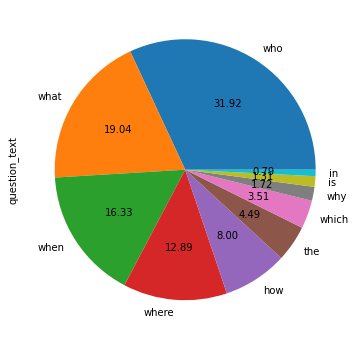

In [34]:
df_qa.question_text.apply(lambda x: x.split()[0]).value_counts().head(10).plot.pie(figsize=(6, 6),autopct='%.2f',)

In [41]:
df_qa[['first','second','document_url']].groupby(['first','second']).count()\
    .sort_values('document_url',ascending=False)\
    .head(50)

document_url
first      second                
what       is                 620
when       did                472
who        is                 372
how        many               358
when       was                285
           does               261
where      is                 260
who        plays              240
           played             236
where      did                234
           does               225
who        was                204
           has                138
           sang               135
           sings              131
           won                131
           wrote              118
what       are                116
where      was                113
what       was                110
when       is                 107
which      of                  99
what       does                89
when       do                  84
who        did                 82
where      do                  80
who        does                65
           are                 64
where      are                 54
list       of                  53
what       kind                43
how        did                 41
what's     the                 40
what       happened            38
why        did                 38
what       do                  36
why        is                  34
what       type                34
how        long                33
           much                32
who        were                32
           owns                27
how        old                 26
which      is                  25
what       happens             24
           episode             23
who        made                23
how        to                  23
what       were                22
difference between             22

In [46]:
df_qa[df_qa['first'].isin(['i','a'])].head(50)

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id,first,second
13,I Had trouble in Getting to Solla Sollew - wik...,"[{'start_token': 26, 'top_level': True, 'end_t...",i had trouble in getting to solla sellew,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=I_...,3151922095559227960,i,had
24,I Love It ( Icona Pop song ) - wikipedia <H1> ...,"[{'start_token': 26, 'top_level': True, 'end_t...",i love it (feat. charli xcx) icona pop,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=I_...,-1309303417180205472,i,love
63,I Am a Fugitive from a Georgia Chain Gang ! - ...,"[{'start_token': 24, 'top_level': True, 'end_t...",i was a fugitive from a georgia chain gang,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=I_...,215150263584504031,i,was
116,Dressing ( medical ) - wikipedia <H1> Dressing...,"[{'start_token': 40, 'top_level': True, 'end_t...",a bandage is a sterile covering for a wound,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Dr...,-7328261701851612157,a,bandage
119,Rivers of Blood speech - wikipedia <H1> Rivers...,"[{'start_token': 49, 'top_level': True, 'end_t...",i see the river tiber foaming with much blood,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Ri...,-7782107652039484565,i,see
353,Dependent and independent variables - wikipedi...,"[{'start_token': 32, 'top_level': True, 'end_t...",a variable that measures an outcome or result ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=De...,6690008037153068907,a,variable
477,In Bloom - wikipedia <H1> In Bloom </H1> For t...,"[{'start_token': 25, 'top_level': True, 'end_t...",i don't know what it means nirvana,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=In...,3941717627682596044,i,don't
690,Bang the Drum all day - wikipedia <H1> Bang th...,"[{'start_token': 20, 'top_level': True, 'end_t...",i don't wanna work i just wanna bang on these ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Ba...,-7912605288994903805,i,don't
766,Arya Samaj - Wikipedia <H1> Arya Samaj </H1> J...,"[{'start_token': 14, 'top_level': True, 'end_t...",a sect is a type of religious organization tha,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Ar...,5697338756982198247,a,sect
790,A Cinderella Story : Once Upon a song - Wikipe...,"[{'start_token': 26, 'top_level': True, 'end_t...",a cinderella story once upon a song katie and ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=A_...,4469558748840682934,a,cinderella


In [61]:
df_qa.loc[0]


document_text             Email marketing - Wikipedia <H1> Email marketi...
long_answer_candidates    [{'start_token': 14, 'top_level': True, 'end_t...
question_text             which is the most common use of opt-in e-mail ...
annotations               [{'yes_no_answer': 'NONE', 'long_answer': {'st...
document_url              https://en.wikipedia.org//w/index.php?title=Em...
example_id                                              5655493461695504401
first                                                                 which
second                                                                   is
Name: 0, dtype: object

In [63]:
df_qa.loc[0]['question_text']

'which is the most common use of opt-in e-mail marketing'

In [74]:
df_qa.loc[0]['annotations'][0]

{'yes_no_answer': 'NONE',
 'long_answer': {'start_token': 1952,
  'candidate_index': 54,
  'end_token': 2019},
 'short_answers': [{'start_token': 1960, 'end_token': 1969}],
 'annotation_id': 593165450220027640}

In [146]:
pd.set_option('display.max_colwidth', 150)


In [151]:
df_qa[df_qa.YES_NO!='NONE'].head(50)

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id,first,second,YES_NO
61,"Commonwealth of Nations - wikipedia <H1> Commonwealth of Nations </H1> Jump to : navigation , search `` The Commonwealth '' redirects here . It is...","[{'start_token': 46, 'top_level': True, 'end_token': 487}, {'start_token': 47, 'top_level': False, 'end_token': 54}, {'start_token': 54, 'top_leve...",is hong kong a part of the commonwealth,"[{'yes_no_answer': 'NO', 'long_answer': {'start_token': 6539, 'candidate_index': 77, 'end_token': 6646}, 'short_answers': [], 'annotation_id': 137...",https://en.wikipedia.org//w/index.php?title=Commonwealth_of_Nations&amp;oldid=814669361,3817861884803470204,is,hong,NO
96,"Public holidays in Spain - wikipedia <H1> Public holidays in Spain </H1> Jump to : navigation , search <P> If one of the `` national holidays '' h...","[{'start_token': 18, 'top_level': True, 'end_token': 115}, {'start_token': 115, 'top_level': True, 'end_token': 145}, {'start_token': 145, 'top_le...",is it a bank holiday today in spain,"[{'yes_no_answer': 'NO', 'long_answer': {'start_token': 201, 'candidate_index': 3, 'end_token': 2334}, 'short_answers': [], 'annotation_id': 17328...",https://en.wikipedia.org//w/index.php?title=Public_holidays_in_Spain&amp;oldid=790626160,-1952240886162329300,is,it,NO
113,"Micrometer - wikipedia <H1> Micrometer </H1> Jump to : navigation , search This article is about the measuring device . For the unit of length , s...","[{'start_token': 59, 'top_level': True, 'end_token': 257}, {'start_token': 257, 'top_level': True, 'end_token': 297}, {'start_token': 297, 'top_le...",is the micrometer screw gauge used for measurement of inner diameter of tube,"[{'yes_no_answer': 'YES', 'long_answer': {'start_token': 1353, 'candidate_index': 15, 'end_token': 1376}, 'short_answers': [], 'annotation_id': 15...",https://en.wikipedia.org//w/index.php?title=Micrometer&amp;oldid=804398195,5429746486027633157,is,the,YES
326,"History of the Philadelphia Eagles - wikipedia <H1> History of the Philadelphia Eagles </H1> Jump to : navigation , search <Table> <Tr> <Td> </Td>...","[{'start_token': 20, 'top_level': True, 'end_token': 240}, {'start_token': 21, 'top_level': False, 'end_token': 239}, {'start_token': 56, 'top_lev...",ok google has the eagles ever won a superbowl,"[{'yes_no_answer': 'YES', 'long_answer': {'start_token': 240, 'candidate_index': 8, 'end_token': 298}, 'short_answers': [], 'annotation_id': 55026...",https://en.wikipedia.org//w/index.php?title=History_of_the_Philadelphia_Eagles&amp;oldid=839372280,-956876439337367747,ok,google,YES
359,"The Chase ( US Game Show ) - Wikipedia <H1> The Chase ( US Game Show ) </H1> <P> </P> <Table> <Tr> <Th_colspan=""2""> The Chase </Th> </Tr> <Tr> <Td...","[{'start_token': 20, 'top_level': True, 'end_token': 269}, {'start_token': 21, 'top_level': False, 'end_token': 27}, {'start_token': 31, 'top_leve...",is the game show the chase still on tv,"[{'yes_no_answer': 'NO', 'long_answer': {'start_token': 1787, 'candidate_index': 37, 'end_token': 2029}, 'short_answers': [], 'annotation_id': 296...",https://en.wikipedia.org//w/index.php?title=The_Chase_(U.S._game_show)&amp;oldid=864196545,-1037037130217912929,is,the,NO
380,Visa policy of Taiwan - wikipedia <H1> Visa policy of Taiwan </H1> Visa sample of Taiwan Entry and exit stamps issued to a national of Singapore a...,"[{'start_token': 31, 'top_level': True, 'end_token': 103}, {'start_token': 103, 'top_level': True, 'end_token': 126}, {'start_token': 262, 'top_le...",do i need a visa to go to taiwan from us,"[{'yes_no_answer': 'NO', 'long_answer': {'start_token': 1600, 'candidate_index': 82, 'end_token': 1675}, 'short_answers': [], 'annotation_id': 650...",https://en.wikipedia.org//w/index.php?title=Visa_policy_of_Taiwan&amp;oldid=846078921,5945982666122000501,do,i,NO
408,"Scottish Cup - wikipedia <H1> Scottish Cup </H1> Jump to : navigation , search <Table> Scottish Cup <Tr> <Td_colspan=""2""> </Td> </Tr> <

In [64]:
df_qa.loc[0]['document_text'].split()[1960:1969]

['a',
 'newsletter',
 'sent',
 'to',
 'an',
 'advertising',
 'firm',
 "'s",
 'customers']

In [67]:
df_qa.loc[0]['document_text']


"Email marketing - Wikipedia <H1> Email marketing </H1> Jump to : navigation , search <Table> <Tr> <Td> </Td> <Td> ( hide ) This article has multiple issues . Please help improve it or discuss these issues on the talk page . ( Learn how and when to remove these template messages ) <Table> <Tr> <Td> </Td> <Td> This article needs additional citations for verification . Please help improve this article by adding citations to reliable sources . Unsourced material may be challenged and removed . ( September 2014 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <Td> </Td> <Td> This article possibly contains original research . Please improve it by verifying the claims made and adding inline citations . Statements consisting only of original research should be removed . ( January 2015 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <T

In [66]:
pd.Series(df_qa.loc[0]['document_text'].split()).value_counts().head(50)


<Li>           161
</Li>          161
.              144
,              135
to              80
the             78
of              69
and             65
email           57
marketing       52
a               44
)               37
(               37
or              29
-               28
in              28
</Ul>           27
''              27
``              27
</P>            27
<P>             27
<Ul>            27
is              25
emails          23
Jump            23
up              23
with            22
^               22
Email           22
for             21
on              20
</H3>           19
<H3>            19
advertising     17
as              17
that            17
:               16
The             16
be              15
<Tr>            14
</Tr>           14
their           12
%               12
Retrieved       12
</Td>           12
messages        12
from            12
<Td>            12
at              11
it              11
dtype: int64

In [54]:
df_qa.loc[0]['annotations'][0]

{'yes_no_answer': 'NONE',
 'long_answer': {'start_token': 1952,
  'candidate_index': 54,
  'end_token': 2019},
 'short_answers': [{'start_token': 1960, 'end_token': 1969}],
 'annotation_id': 593165450220027640}

In [47]:
25+15+13+10+6+1

70

In [52]:
df_qa.question_text.apply(lambda x: ' '.join(x.split()[:1])).value_counts().head(50)

who           2502
what          1492
when          1280
where         1010
how            627
the            352
which          275
why            135
is             103
in              62
a               62
list            61
what's          45
who's           34
i               31
do              27
does            24
name            24
all             22
can             22
difference      22
describe        21
are             20
cast            20
most            16
explain         16
did             14
an              14
write           14
top             13
last            12
two             12
first           11
you             11
one             11
meaning         10
star            10
new             10
at               9
was              8
summary          8
give             8
names            8
actor            8
to               8
discuss          8
my               8
song             8
according        8
if               7
Name: question_text, dtype: int64

In [56]:
df_qa.loc[0]['document_url']


'https://en.wikipedia.org//w/index.php?title=Email_marketing&amp;oldid=814071202'

In [37]:
df_qa.question_text.apply(lambda x: ' '.join(x.split()[:2])).value_counts().head(50)

what is               620
when did              472
who is                372
how many              358
when was              285
when does             261
where is              260
who plays             240
who played            236
where did             234
where does            225
who was               204
who has               138
who sang              135
who won               131
who sings             131
who wrote             118
what are              116
where was             113
what was              110
when is               107
which of               99
what does              89
when do                84
who did                82
where do               80
who does               65
who are                64
where are              54
list of                53
what kind              43
how did                41
what's the             40
what happened          38
why did                38
what do                36
what type              34
why is                 34
how long    

In [14]:
import json

json.loads(single_line).keys()

dict_keys(['document_text', 'long_answer_candidates', 'question_text', 'annotations', 'document_url', 'example_id'])

In [19]:
json.loads(single_line)['question_text']

'which is the most common use of opt-in e-mail marketing'

In [20]:
json.loads(single_line)['annotations']

[{'yes_no_answer': 'NONE',
  'long_answer': {'start_token': 1952,
   'candidate_index': 54,
   'end_token': 2019},
  'short_answers': [{'start_token': 1960, 'end_token': 1969}],
  'annotation_id': 593165450220027640}]